In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

In [2]:
from statsbombpy import sb
sb.matches(competition_id=53, season_id=106)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3835331,2022-07-13,18:00:00.000,Europe - UEFA Women's Euro,2022,Sweden Women's,Switzerland Women's,2,1,available,...,2023-04-14T11:27:39.402579,2,Group Stage,Bramall Lane,Marta Huerta de Aza,Peter Gerhardsson,Nils Herbert Kromann Nielsen,1.1.0,2,2
1,3835324,2022-07-09,21:00:00.000,Europe - UEFA Women's Euro,2022,Netherlands Women's,Sweden Women's,1,1,available,...,2023-04-14T11:23:11.894822,1,Group Stage,Bramall Lane,Cheryl Foster,Mark Richard David Parsons,Peter Gerhardsson,1.1.0,2,2
2,3844384,2022-07-20,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Spain Women's,2,1,available,...,2023-04-26T02:03:52.207197,4,Quarter-finals,The American Express Community Stadium,Stéphanie Frappart,Sarina Glotzbach-Wiegman,Jorge Vilda,1.1.0,2,2
3,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2023-04-25T23:30:59.168837,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
4,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2023-04-26T00:44:10.275394,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2
5,3835335,2022-07-15,21:00:00.000,Europe - UEFA Women's Euro,2022,Northern Ireland,England Women's,0,5,available,...,2023-04-14T11:30:52.358455,3,Group Stage,St. Mary''s Stadium,Esther Staubli,Kenny Shiels,Sarina Glotzbach-Wiegman,1.1.0,2,2
6,3835323,2022-07-09,18:00:00.000,Europe - UEFA Women's Euro,2022,Portugal Women's,Switzerland Women's,2,2,available,...,2023-04-14T11:22:32.701542,1,Group Stage,Leigh Sports Village Stadium,Jana Adamkova,Francisco Miguel Conceição Roque Neto,Nils Herbert Kromann Nielsen,1.1.0,2,2
7,3835325,2022-07-10,21:00:00.000,Europe - UEFA Women's Euro,2022,France Women's,Italy Women's,5,1,available,...,2023-04-14T11:24:27.184039,1,Group Stage,AESSEAL New York Stadium,Rebecca Welch,Corinne Catherine Diacre,Milena Bertolini,1.1.0,2,2
8,3835320,2022-07-07,21:00:00.000,Europe - UEFA Women's Euro,2022,Norway Women's,Northern Ireland,4,1,available,...,2023-04-14T11:20:43.839249,1,Group Stage,St. Mary''s Stadium,Lina Lehtovaara,Martin Sjögren,Kenny Shiels,1.1.0,2,2
9,3845507,2022-07-27,21:00:00.000,Europe - UEFA Women's Euro,2022,Germany Women's,France Women's,2,1,available,...,2023-04-26T00:43:32.921353,5,Semi-finals,Stadium MK,Cheryl Foster,Martina Voss-Tecklenburg,Corinne Catherine Diacre,1.1.0,2,2


In [3]:
matches_data = sb.matches(competition_id=53, season_id=106)
matches_df = pd.DataFrame(matches_data)

games = matches_df.match_id.tolist()
home_team = matches_df.home_team.tolist()
away_team = matches_df.away_team.tolist()

table = pd.DataFrame({'Match ID': games, 'Home Team': home_team, 'Away Team': away_team})
table['Home Team'] = table['Home Team'].str.replace(" Women's", "")
table['Away Team'] = table['Away Team'].str.replace(" Women's", "")

table

,Match ID,Home Team,Away Team
0,3835331,Sweden,Switzerland
1,3835324,Netherlands,Sweden
2,3844384,England,Spain
3,3847567,England,Germany
4,3845506,England,Sweden
5,3835335,Northern Ireland,England
6,3835323,Portugal,Switzerland
7,3835325,France,Italy
8,3835320,Norway,Northern Ireland
9,3845507,Germany,France


In [11]:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
for i, row in table.iterrows():
    match_id = row['Match ID']
    home_team = row['Home Team']
    away_team = row['Away Team']
    file_name = f'{match_id}_{home_team}_vs_{away_team}.csv'
    file_path = os.path.join(desktop_path, file_name)
    
    match_data = sb.events(match_id=match_id)
    match_df = pd.DataFrame(match_data)
    
    match_df.to_csv(file_path, index=False)
    print(f'{file_name} exported successfully')

3835331_Sweden_vs_Switzerland.csv exported successfully
3835324_Netherlands_vs_Sweden.csv exported successfully
3844384_England_vs_Spain.csv exported successfully
3847567_England_vs_Germany.csv exported successfully
3845506_England_vs_Sweden.csv exported successfully
3835335_Northern Ireland_vs_England.csv exported successfully
3835323_Portugal_vs_Switzerland.csv exported successfully
3835325_France_vs_Italy.csv exported successfully
3835320_Norway_vs_Northern Ireland.csv exported successfully
3845507_Germany_vs_France.csv exported successfully
3844387_France_vs_Netherlands.csv exported successfully
3844385_Germany_vs_Austria.csv exported successfully
3844386_Sweden_vs_Belgium.csv exported successfully
3835342_Iceland_vs_France.csv exported successfully
3835337_Denmark_vs_Spain.csv exported successfully
3835338_WNT Finland_vs_Germany.csv exported successfully
3835330_Germany_vs_Spain.csv exported successfully
3835329_Denmark_vs_WNT Finland.csv exported successfully
3835322_Germany_vs_D

In [4]:
import os
import pandas as pd

csv_directory = os.path.expanduser("~/Desktop/python/data")

merged_data = pd.DataFrame()

for file_name in os.listdir(csv_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(csv_directory, file_name)
        
        df = pd.read_csv(file_path)
        
        merged_data = merged_data.append(df, ignore_index=True)

merged_file_path = os.path.join(csv_directory, "merged_data.csv")

merged_data.to_csv(merged_file_path, index=False)

print("CSV files merged successfully.")
print("Merged data saved to:", merged_file_path)


C:\Users\SINGER\AppData\Local\Temp\ipykernel_21796\451503144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(df, ignore_index=True)
C:\Users\SINGER\AppData\Local\Temp\ipykernel_21796\451503144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(df, ignore_index=True)
C:\Users\SINGER\AppData\Local\Temp\ipykernel_21796\451503144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged_data.append(df, ignore_index=True)
C:\Users\SINGER\AppData\Local\Temp\ipykernel_21796\451503144.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_data = merged

CSV files merged successfully.
Merged data saved to: C:\Users\SINGER/Desktop/python/data\merged_data.csv


In [4]:
df = pd.read_csv('euro.csv')
df


C:\Users\SINGER\AppData\Local\Temp\ipykernel_4264\3714851417.py:1: DtypeWarning: Columns (7,15,16,26,40,46,71,85,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('euro.csv')


,ball_receipt_outcome,ball_recovery_recovery_failure,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,clearance_right_foot,counterpress,...,ball_recovery_offensive,shot_open_goal,goalkeeper_shot_saved_off_target,shot_saved_off_target,goalkeeper_shot_saved_to_post,goalkeeper_success_in_play,block_save_block,bad_behaviour_card,shot_saved_to_post,half_start_late_video_start
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.columns.tolist()

['ball_receipt_outcome',
 'ball_recovery_recovery_failure',
 'carry_end_location',
 'clearance_aerial_won',
 'clearance_body_part',
 'clearance_head',
 'clearance_left_foot',
 'clearance_other',
 'clearance_right_foot',
 'counterpress',
 'dribble_nutmeg',
 'dribble_outcome',
 'duel_outcome',
 'duel_type',
 'duration',
 'foul_committed_advantage',
 'foul_won_advantage',
 'foul_won_defensive',
 'goalkeeper_body_part',
 'goalkeeper_end_location',
 'goalkeeper_outcome',
 'goalkeeper_position',
 'goalkeeper_technique',
 'goalkeeper_type',
 'id',
 'index',
 'injury_stoppage_in_chain',
 'interception_outcome',
 'location',
 'match_id',
 'minute',
 'miscontrol_aerial_won',
 'off_camera',
 'out',
 'pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_inswinging',
 'pass_length',
 'pass_no_touch',
 'pass_outcome',
 'pass_recipient',
 'pass_shot_assist',
 

In [6]:
columns_to_keep = ['match_id','minute', 'index', 'timestamp', 'team', 'player', 'type', 'pass_outcome','position', 'location', 'pass_end_location', 'under_pressure']
df = df[columns_to_keep]
df

,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,location,pass_end_location,under_pressure
0,3835319,0,1,00:00:00.000,England Women's,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN
1,3835319,0,2,00:00:00.000,Austria Women's,NaN,Starting XI,NaN,NaN,NaN,NaN,NaN
2,3835319,0,3,00:00:00.000,England Women's,NaN,Half Start,NaN,NaN,NaN,NaN,NaN
3,3835319,0,4,00:00:00.000,Austria Women's,NaN,Half Start,NaN,NaN,NaN,NaN,NaN
4,3835319,45,1767,00:00:00.000,Austria Women's,NaN,Half Start,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105152,3847567,114,3559,00:09:26.403,Germany Women's,NaN,Tactical Shift,NaN,NaN,NaN,NaN,NaN
105153,3847567,60,1706,00:15:46.021,England Women's,Bethany Mead,Player Off,NaN,Right Wing,NaN,NaN,NaN
105154,3847567,62,1738,00:17:54.912,England Women's,Bethany Mead,Player On,NaN,Right Wing,NaN,NaN,NaN
105155,3847567,77,2225,00:32:55.824,England Women's,Keira Walsh,Error,NaN,Left Defensive Midfield,"[8.7, 51.3]",NaN,NaN


In [7]:
df['type'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Duel', 'Ball Recovery', 'Pressure', 'Miscontrol', 'Dribbled Past',
       'Dribble', 'Clearance', 'Foul Committed', 'Foul Won',
       'Goal Keeper', 'Dispossessed', 'Interception', 'Shot', 'Block',
       'Tactical Shift', 'Half End', 'Shield', 'Substitution',
       'Injury Stoppage', 'Referee Ball-Drop', 'Error', 'Player Off',
       'Player On', '50/50', 'Offside', 'Bad Behaviour',
       'Own Goal Against', 'Own Goal For'], dtype=object)

In [8]:
values_to_drop = ['Substitution', 'Injury Stoppage', 'Referee Ball-Drop', 'Error', 'Player Off',
                  'Player On', '50/50', 'Offside', 'Bad Behaviour', 'Own Goal Against', 'Own Goal For','Starting XI','Half Start','Tactical Shift', 'Half End']

df = df[~df['type'].isin(values_to_drop)]

df

,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,location,pass_end_location,under_pressure
6,3835319,0,5,00:00:00.118,Austria Women's,Nicole Billa,Pass,NaN,Center Forward,"[61.0, 40.1]","[48.3, 44.2]",NaN
7,3835319,0,8,00:00:02.115,Austria Women's,Sarah Puntigam,Pass,NaN,Center Defensive Midfield,"[43.5, 45.2]","[27.7, 39.6]",NaN
8,3835319,0,11,00:00:04.403,Austria Women's,Viktoria Schnaderbeck,Pass,NaN,Left Center Back,"[26.9, 37.6]","[24.9, 58.6]",NaN
9,3835319,0,14,00:00:09.827,Austria Women's,Carina Wenninger,Pass,Incomplete,Right Center Back,"[37.6, 66.7]","[73.2, 66.5]",NaN
10,3835319,0,16,00:00:11.763,England Women's,Rachel Daly,Pass,Incomplete,Left Back,"[46.9, 13.6]","[59.7, 14.9]",True
...,...,...,...,...,...,...,...,...,...,...,...,...
105111,3847567,107,3420,00:02:28.388,Germany Women's,Linda Dallmann,Foul Won,NaN,Left Center Midfield,"[49.0, 27.5]",NaN,True
105112,3847567,112,3517,00:07:19.580,England Women's,Alessia Russo,Foul Won,NaN,Center Forward,"[66.4, 56.4]",NaN,True
105113,3847567,115,3588,00:10:07.449,England Women's,Chloe Kelly,Foul Won,NaN,Right Wing,"[115.9, 71.0]",NaN,True
105114,3847567,120,3676,00:15:10.057,England Women's,Lucy Bronze,Foul Won,NaN,Right Back,"[111.7, 77.4]",NaN,True


In [9]:
incomplete = ['Incomplete']
df = df[~df['pass_outcome'].isin(incomplete)]
df = df.sort_values(['match_id', 'index'])
df

,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,location,pass_end_location,under_pressure
6,3835319,0,5,00:00:00.118,Austria Women's,Nicole Billa,Pass,NaN,Center Forward,"[61.0, 40.1]","[48.3, 44.2]",NaN
966,3835319,0,6,00:00:01.077,Austria Women's,Sarah Puntigam,Ball Receipt*,NaN,Center Defensive Midfield,"[48.3, 44.2]",NaN,NaN
1815,3835319,0,7,00:00:01.077,Austria Women's,Sarah Puntigam,Carry,NaN,Center Defensive Midfield,"[48.3, 44.2]",NaN,NaN
7,3835319,0,8,00:00:02.115,Austria Women's,Sarah Puntigam,Pass,NaN,Center Defensive Midfield,"[43.5, 45.2]","[27.7, 39.6]",NaN
967,3835319,0,9,00:00:03.479,Austria Women's,Viktoria Schnaderbeck,Ball Receipt*,NaN,Left Center Back,"[27.7, 39.6]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
105073,3847567,121,3692,00:16:28.781,England Women's,Alessia Russo,Foul Committed,NaN,Center Forward,"[86.2, 56.0]",NaN,NaN
105115,3847567,121,3693,00:16:28.781,Germany Women's,Lena Oberdorf,Foul Won,NaN,Left Defensive Midfield,"[33.9, 24.1]",NaN,True
103439,3847567,121,3695,00:16:58.453,Germany Women's,Linda Dallmann,Duel,NaN,Right Attacking Midfield,"[93.7, 24.5]",NaN,True
103501,3847567,121,3696,00:16:58.453,England Women's,Jill Scott,Clearance,NaN,Right Defensive Midfield,"[26.4, 55.6]",NaN,True


In [11]:
df['team'].unique()

array(["Austria Women's", "England Women's", "Norway Women's",
       'Northern Ireland', "Spain Women's", 'WNT Finland',
       "Germany Women's", "Denmark Women's", "Switzerland Women's",
       "Portugal Women's", "Sweden Women's", "Netherlands Women's",
       "France Women's", "Italy Women's", "Iceland Women's",
       "Belgium Women's"], dtype=object)

In [18]:
engdf = df[df['team'] == "England Women's"]
ausdf = df[df['team'] == "Austria Women's"]
beldf = df[df['team'] == "Belgium Women's"]
fradf = df[df['team'] == "France Women's"]
gerdf = df[df['team'] == "Germany Women's"]
netdf = df[df['team'] == "Netherlands Women's"]
spndf = df[df['team'] == "Spain Women's"]
swddf = df[df['team'] == "Sweden Women's"]
merged_df = pd.concat([engdf, ausdf, beldf, fradf, gerdf, netdf, spndf, swddf])
merged_df.to_csv('q.csv', index=False)


In [10]:
df = pd.read_csv('womenseuro2022.csv')
df = df[df['type'].isin(['Shot', 'Pass'])]

df.head(20)

,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,x,y,xx,yy,under_pressure
6,3835319,0,45,00:00:32,England Women's,Lauren Hemp,Pass,NaN,Left Wing,20.5,25.3,12.4,29.7,NaN
9,3835319,0,49,00:00:33,England Women's,Leah Williamson,Pass,NaN,Left Center Back,13.2,28.9,18.0,8.8,True
13,3835319,1,78,00:01:08,England Women's,Rachel Daly,Pass,NaN,Left Back,62.9,22.3,72.8,17.2,NaN
18,3835319,2,109,00:02:38,England Women's,Leah Williamson,Pass,NaN,Left Center Back,8.6,24.1,2.6,33.9,NaN
28,3835319,3,145,00:03:09,England Women's,Bethany Mead,Pass,NaN,Right Wing,32.9,69.2,48.9,70.0,True
36,3835319,3,171,00:03:40,England Women's,Georgia Stanway,Pass,Out,Right Defensive Midfield,91.8,70.2,120.0,53.5,NaN
40,3835319,4,184,00:04:16,England Women's,Rachel Daly,Pass,NaN,Left Back,47.9,13.1,49.9,18.5,True
47,3835319,4,197,00:04:24,England Women's,Keira Walsh,Pass,NaN,Left Defensive Midfield,18.8,28.3,18.8,22.0,NaN
50,3835319,4,201,00:04:25,England Women's,Rachel Daly,Pass,NaN,Left Back,16.2,23.5,14.2,27.6,True
59,3835319,5,216,00:05:16,England Women's,Bethany Mead,Pass,NaN,Right Wing,58.9,54.7,70.3,22.5,NaN


In [21]:
engdf = df[df['team'] == "England Women's"]
ausdf = df[df['team'] == "Austria Women's"]
beldf = df[df['team'] == "Belgium Women's"]
fradf = df[df['team'] == "France Women's"]
gerdf = df[df['team'] == "Germany Women's"]
netdf = df[df['team'] == "Netherlands Women's"]
spndf = df[df['team'] == "Spain Women's"]
swddf = df[df['team'] == "Sweden Women's"]

fradf.head(50)

,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,x,y,xx,yy,under_pressure
22418,3835325,0,5,1900-01-01 00:00:01,France Women's,Marie-Antoinette Katoto,Pass,NaN,Center Forward,60.0,40.0,48.0,38.4,NaN
22421,3835325,0,8,1900-01-01 00:00:03,France Women's,Charlotte Bilbault,Pass,NaN,Center Defensive Midfield,48.0,41.4,43.3,55.5,NaN
22428,3835325,0,19,1900-01-01 00:00:15,France Women's,Kadidiatou Diani,Pass,NaN,Right Wing,110.0,69.7,101.9,66.0,NaN
22431,3835325,0,22,1900-01-01 00:00:16,France Women's,Onema Grace Geyoro,Pass,NaN,Right Center Midfield,101.0,64.3,105.3,70.9,NaN
22434,3835325,0,27,1900-01-01 00:00:48,France Women's,Sandie Toletti,Pass,NaN,Left Center Midfield,120.0,80.0,112.1,41.9,NaN
22436,3835325,0,29,1900-01-01 00:00:50,France Women's,A��ssatou Tounkara,Shot,NaN,Right Center Back,112.1,39.4,NaN,NaN,NaN
22452,3835325,1,77,1900-01-01 00:01:35,France Women's,Sakina Karchaoui,Pass,NaN,Left Back,14.2,11.7,14.0,4.2,NaN
22455,3835325,1,80,1900-01-01 00:01:37,France Women's,Delphine Cascarino,Pass,NaN,Left Wing,13.3,3.8,15.0,11.7,NaN
22458,3835325,1,83,1900-01-01 00:01:39,France Women's,Sakina Karchaoui,Pass,NaN,Left Back,15.0,11.7,18.5,2.1,NaN
22462,3835325,1,89,1900-01-01 00:01:54,France Women's,Sakina Karchaoui,Pass,NaN,Left Back,31.9,0.1,47.1,4.4,NaN


In [49]:
import pandas as pd

# Assuming you have a DataFrame named 'df' with the desired data

# Convert the 'timestamp' column to datetime objects
ausdf['timestamp'] = pd.to_datetime(ausdf['timestamp'], format='%H:%M:%S')

# Filter rows for shots
shot_rows = ausdf[ausdf['type'] == 'Shot']

# Initialize a list to store the filtered rows
filtered_rows = []

# Iterate over shot rows
for _, shot_row in shot_rows.iterrows():
    shot_time = shot_row['timestamp']
    start_time = shot_time - pd.Timedelta(seconds=15)
    pass_rows_before_shot = ausdf[(ausdf['timestamp'] >= start_time) & (ausdf['timestamp'] < shot_time)]
    filtered_rows.extend(pass_rows_before_shot.values.tolist())

# Create a new DataFrame with the filtered rows
filtered_df = pd.DataFrame(filtered_rows, columns=df.columns)

# Print the resulting rows


filtered_df = filtered_df.sort_values(['timestamp'])
filtered_df

C:\Users\SINGER\AppData\Local\Temp\ipykernel_25916\1079429322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ausdf['timestamp'] = pd.to_datetime(ausdf['timestamp'], format='%H:%M:%S')


,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,x,y,xx,yy,under_pressure
261,3835319,0,65,1900-01-01 00:00:49,Austria Women's,Manuela Zinsberger,Pass,NaN,Goalkeeper,15.3,47.4,26.3,62.9,NaN
270,3835336,45,1792,1900-01-01 00:00:53,Austria Women's,Viktoria Schnaderbeck,Pass,NaN,Left Center Back,31.4,16.2,52.0,6.7,NaN
266,3835328,45,1395,1900-01-01 00:00:53,Austria Women's,Verena Hanshaw,Pass,NaN,Left Back,80.7,0.1,75.7,8.5,NaN
267,3835328,45,1397,1900-01-01 00:00:54,Austria Women's,Sarah Puntigam,Pass,NaN,Center Defensive Midfield,75.1,8.5,79.0,2.5,NaN
271,3835336,45,1794,1900-01-01 00:00:55,Austria Women's,Verena Hanshaw,Pass,NaN,Left Back,52.6,7.0,77.8,14.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3835328,91,2773,1900-01-01 00:46:57,Austria Women's,Laura Feiersinger,Pass,NaN,Left Center Midfield,91.2,44.5,97.2,30.5,NaN
174,3844385,91,3123,1900-01-01 00:46:58,Austria Women's,Barbara Dunst,Pass,NaN,Right Midfield,73.4,73.3,84.8,62.8,NaN
259,3835336,47,1690,1900-01-01 00:47:14,Austria Women's,Laura Wienroither,Pass,NaN,Right Back,112.1,80.0,108.9,74.3,NaN
260,3835336,47,1693,1900-01-01 00:47:15,Austria Women's,Sarah Zadrazil,Pass,NaN,Right Center Midfield,108.9,74.3,114.7,77.2,NaN


In [50]:
from scipy.ndimage import gaussian_filter


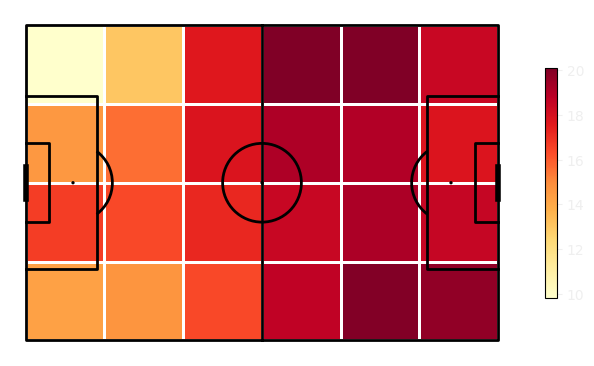

In [51]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='white', line_color='black')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('white')
bin_statistic = pitch.bin_statistic(filtered_df.x, filtered_df.y, statistic='count', bins=(6, 4))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='YlOrRd', edgecolors='white')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('black')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')





In [52]:
import pandas as pd

# Assuming you have the data stored in a DataFrame called 'df'
# and 'type' is the name of the column

# Filter rows with 'Shot' in the 'type' column
shot_rows = ausdf[ausdf['type'] == 'Shot']

# Find the index of the first shot row
first_shot_index = shot_rows.index[0]

# Get the rows before the first shot row
rows_before_shot = ausdf.loc[:first_shot_index - 1]

# Print the resulting rows
rows_before_shot


,match_id,minute,index,timestamp,team,player,type,pass_outcome,position,x,y,xx,yy,under_pressure
10992,3835319,0,5,1900-01-01 00:00:00,Austria Women's,Nicole Billa,Pass,NaN,Center Forward,61.0,40.1,48.3,44.2,NaN
10995,3835319,0,8,1900-01-01 00:00:02,Austria Women's,Sarah Puntigam,Pass,NaN,Center Defensive Midfield,43.5,45.2,27.7,39.6,NaN
10998,3835319,0,11,1900-01-01 00:00:04,Austria Women's,Viktoria Schnaderbeck,Pass,NaN,Left Center Back,26.9,37.6,24.9,58.6,NaN
11004,3835319,0,20,1900-01-01 00:00:14,Austria Women's,Sarah Zadrazil,Pass,NaN,Right Center Midfield,62.2,63.4,63.8,55.6,True
11012,3835319,0,31,1900-01-01 00:00:19,Austria Women's,Nicole Billa,Pass,NaN,Center Forward,70.6,57.1,81.0,76.9,NaN
11015,3835319,0,34,1900-01-01 00:00:26,Austria Women's,Barbara Dunst,Pass,NaN,Right Wing,92.2,51.5,91.2,40.4,NaN
11018,3835319,0,37,1900-01-01 00:00:28,Austria Women's,Laura Feiersinger,Pass,NaN,Left Center Midfield,90.4,37.8,80.6,49.0,NaN
11027,3835319,0,56,1900-01-01 00:00:39,Austria Women's,Sarah Puntigam,Pass,NaN,Center Defensive Midfield,81.2,74.1,93.7,68.8,NaN
11032,3835319,0,62,1900-01-01 00:00:46,Austria Women's,Viktoria Schnaderbeck,Pass,NaN,Left Center Back,48.3,45.6,15.5,43.4,NaN
11035,3835319,0,65,1900-01-01 00:00:49,Austria Women's,Manuela Zinsberger,Pass,NaN,Goalkeeper,15.3,47.4,26.3,62.9,NaN


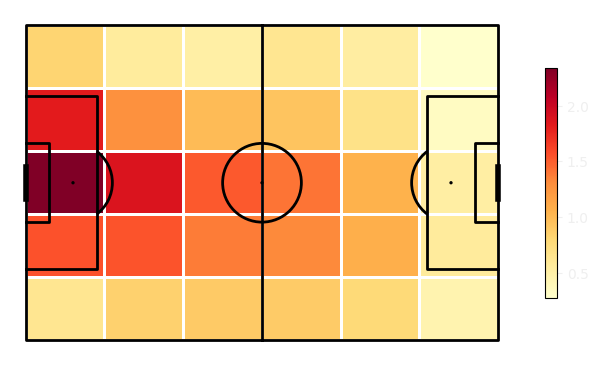

In [53]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='white', line_color='black')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('white')
bin_statistic = pitch.bin_statistic(rows_before_shot.x, rows_before_shot.y, statistic='count', bins=(6, 5))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='YlOrRd', edgecolors='white')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('black')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')